In [1]:
# import pandas as pd
import astropy as ap
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
# from astropy.io import fits
import pdb
from scipy.ndimage.filters import maximum_filter1d
import glob
import fitsio as fits

In [2]:
from multiprocessing.pool import Pool

In [3]:
indir = 'kepler/q17/'

In [4]:
outdir = 'kepler/processed/'
os.makedirs(outdir, exist_ok=True)

In [5]:
files = glob.glob(os.path.join(indir, '*.fits'))

In [8]:
data = fits.read('kepler/q17/kplr010000069-2013131215648_llc.fits')

In [18]:
data = data.astype([(x, '<f8') for x in data.dtype.names])
time = data['TIME']
bool_time = ~np.isnan(time)
sap_flux = data['SAP_FLUX']
sap_flux_o_err = data['SAP_FLUX']/data['SAP_FLUX_ERR']
sap_flux_o_err = sap_flux_o_err/np.nanmax(sap_flux_o_err)

In [25]:
np.nanmax(np.diff(time))

0.020434426493011415

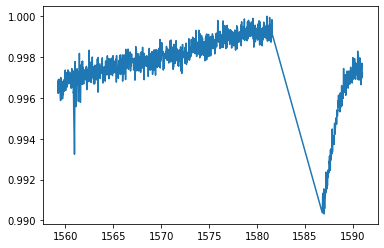

In [20]:
sns.lineplot(x=time.reshape(-1),y=sap_flux_o_err)

In [13]:
sap_flux_o_err

array([2386.11374981, 2384.56957171, 2386.01546244, ..., 2388.11871848,
       2386.42236679, 2386.89540672])

### Process

In [ ]:
def proc(filename, w=50, max_len=250):
    outname = outdir + filename.split(indir)[1]
    outname = outname.split('.')[0] + '.npy'
    try:
        data = fits.read(filename, ext=None)
    except:
        return
    data = data.astype([(x, '<f8') for x in data.dtype.names])
    time = data['TIME']
    bool_time = ~np.isnan(time)
    sap_flux_o_err = data['SAP_FLUX']/data['SAP_FLUX_ERR']
    sap_flux_o_err = sap_flux_o_err/np.nanmax(sap_flux_o_err)
    bool_flux = ~np.isnan(sap_flux_o_err)
    valid = (bool_flux == bool_time) & (bool_time == True)
    time = time[valid]
    sap_flux_o_err = sap_flux_o_err[valid]
    assert(time.shape == sap_flux_o_err.shape)
    sap_flux_o_err = maximum_filter1d(sap_flux_o_err, size=w)
    res = np.stack([time, sap_flux_o_err])
    res = res[:, ::w]
    try:
        res = res[:, :max_len]
    except:
        return
    np.save(outname, res)    

In [ ]:
pool = Pool(7)

In [ ]:
a = pool.map(proc, files)

In [ ]:
pool.close()
pool.join()

In [ ]:
t, y = proc(files[12])

In [ ]:
sns.lineplot(t,y)

In [ ]:
x = np.stack([t,y])

In [ ]:
x.shape

In [ ]:
test = files[10]

In [ ]:
def proc2(filename, w=50, max_len=250):
    outname = outdir + filename.split(indir)[1]
    outname = outname.split('.')[0] + '.npy'
    try:
        data = fits.read(filename, ext=None)
    except:
        return
    data = data.astype([(x, '<f8') for x in data.dtype.names])
    time = data['TIME']
    bool_time = ~np.isnan(time)
    sap_flux_o_err = data['SAP_FLUX']/data['SAP_FLUX_ERR']
    sap_flux_o_err = sap_flux_o_err/np.nanmax(sap_flux_o_err)
    bool_flux = ~np.isnan(sap_flux_o_err)
    valid = (bool_flux == bool_time) & (bool_time == True)
    time = time[valid]
    sap_flux_o_err = sap_flux_o_err[valid]
    assert(time.shape == sap_flux_o_err.shape)
    sap_flux_o_err = maximum_filter1d(sap_flux_o_err, size=w)
    res = np.stack([time, sap_flux_o_err])
    res = res[:, ::w]
    res = res[:, :250]
    return time, sap_flux_o_err, res

In [ ]:
time, y, res = proc2(test)

In [ ]:
res.shape

In [ ]:
sns.lineplot(x=res[0], y=res[1])

In [ ]:
dts = time[1:] - time[0:-1]

In [ ]:
dts.min()